In [92]:
%matplotlib inline
import numpy as np
from msmbuilder.msm import MarkovStateModel
from pyemma.msm import estimate_markov_model
import msmtools.generation as msmgen
import numpy.linalg as LA
from matplotlib.pylab import plt

In [93]:
R = 0.995
P = np.array([[R, 1-R],
              [1-R, R]])

vals, vecs = LA.eig(P)
t = int(-1/np.log(vals[1]))
print('Equilibrium distribution = {}'.format(vecs[:,0]))
print('Second slowest process = {}'.format(vecs[:,1]))
print('Timescale = {} steps'.format(t))



Equilibrium distribution = [ 0.70710678  0.70710678]
Second slowest process = [-0.70710678  0.70710678]
Timescale = 99 steps


In [109]:
t_max = t*10
eqm_trajs = []
for i in range(300):
    traj = msmgen.generate_traj(P, t_max)
    eqm_trajs.append(traj)
eqm_trajs = np.array(eqm_trajs)
print(eqm_trajs.shape)

(300, 990)


In [95]:
long_traj = msmgen.generate_traj(P, int(1e5))
print(long_traj.shape)

(100000,)


In [110]:
t_max = t*10
non_eqm_trajs = []
for i in range(300):
    traj = msmgen.generate_traj(P, t_max, start=0)
    non_eqm_trajs.append(traj)
non_eqm_trajs = np.array(non_eqm_trajs)
print(non_eqm_trajs.shape)

(300, 990)


In [111]:
long_its = []
traj_lens = np.arange(int(t/2), long_traj.shape[0], 10*t)
lags = np.array([1,2,10,100,200,500])

for traj_len in traj_lens:
    tmp = []
    for lag in lags:
        try:
            msm = estimate_markov_model([long_traj[:traj_len]], lag=lag)
            tmp.append(msm.timescales()[0])
        except:
            tmp.append(np.nan)
    long_its.append(tmp)
long_its = np.array(long_its).T

print(long_its.shape)

(6, 101)


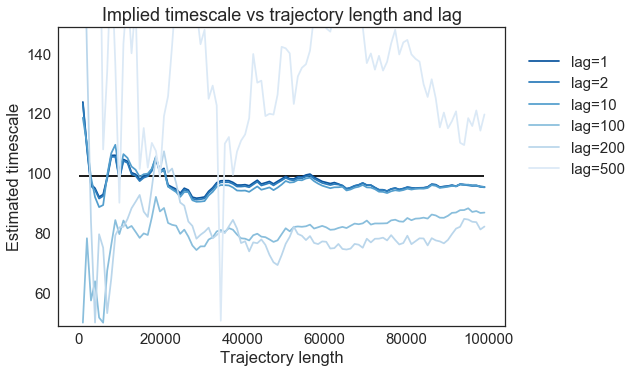

In [112]:
import seaborn as sns
sns.set_style("white")
cols = sns.diverging_palette(255, 133, l=60, n= lags.shape[0], center="dark")
cols = sns.color_palette("Blues_r", lags.shape[0])

with sns.plotting_context("notebook", font_scale=1.5):
    for i in range(lags.shape[0]):
        plt.plot(traj_lens, long_its[i], c=cols[i], label='lag={}'.format(lags[i]))
    plt.hlines(t, xmin=0, xmax=traj_lens[-1])
    plt.legend(bbox_to_anchor=(1.3, 0.95))
    plt.ylim(t-50, t+50)
    plt.xlabel('Trajectory length')
    plt.ylabel('Estimated timescale')
    plt.title("Implied timescale vs trajectory length and lag")

In [153]:
eqm_its = []
for ntraj in range(1,eqm_trajs.shape[0]+1):
    tmp = []
    for lag in lags:
        try:
            msm = estimate_markov_model(list(eqm_trajs[:ntraj,:]), lag=lag)
            tmp.append(msm.timescales()[0])
        except:
            tmp.append(np.nan)
    eqm_its.append(tmp)
eqm_its = np.array(eqm_its).T

print(eqm_its.shape)


(7, 300)


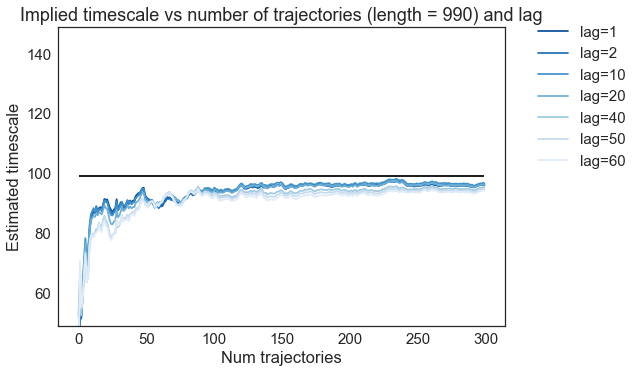

In [155]:
import seaborn as sns
sns.set_style("white")
cols = sns.diverging_palette(255, 133, l=60, n= lags.shape[0], center="dark")
cols = sns.color_palette("Blues_r", lags.shape[0])
x = range(eqm_its.shape[1])
with sns.plotting_context("notebook", font_scale=1.5):
    for i in range(lags.shape[0]):
        plt.plot(x, eqm_its[i],c=cols[i], label='lag={}'.format(lags[i]))
    plt.hlines(t, xmin=0, xmax=x[-1])
    plt.legend(bbox_to_anchor=(1.3, 1.05))
    plt.ylim(t-50, t+50)
    plt.xlabel('Num trajectories')
    plt.ylabel('Estimated timescale')
    plt.title("Implied timescale vs number of trajectories (length = {}) and lag".format(eqm_trajs.shape[1]))

In [156]:
short_eqm_its = []
lags = np.array([1,2,10,20,40, 50,60])
tfrac = int(0.5*t)
print(tfrac)
for ntraj in range(1,eqm_trajs.shape[0]+1):
    tmp = []
    for lag in lags:
        try:
            traj = eqm_trajs[:ntraj,:tfrac]
            msm = estimate_markov_model(list(traj), lag=lag)
            tmp.append(msm.timescales()[0])
        except:
            tmp.append(np.nan)
    short_eqm_its.append(tmp)
short_eqm_its = np.array(short_eqm_its).T


49


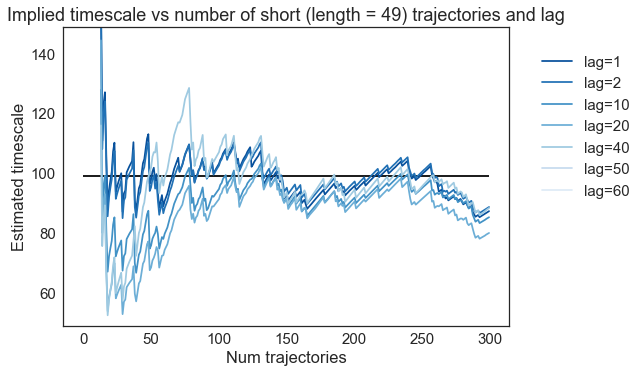

In [157]:
import seaborn as sns
sns.set_style("white")
cols = sns.color_palette("Blues_r", lags.shape[0])
x = range(eqm_its.shape[1])
with sns.plotting_context("notebook", font_scale=1.5):
    for i in range(lags.shape[0]):
        plt.plot(x, short_eqm_its[i],c=cols[i], label='lag={}'.format(lags[i]))
    plt.hlines(t, xmin=0, xmax=x[-1])
    plt.legend(bbox_to_anchor=(1.3, 0.95))
    plt.ylim(t-50, t+50)
    plt.xlabel('Num trajectories')
    plt.ylabel('Estimated timescale')
    plt.title("Implied timescale vs number of short (length = {}) trajectories and lag".format(tfrac))

In [167]:
non_eqm_its = []
for ntraj in range(1,non_eqm_trajs.shape[0]+1):
    tmp = []
    for lag in lags:
        try:
            msm = estimate_markov_model(list(non_eqm_trajs[:ntraj,:]), lag=lag)
            tmp.append(msm.timescales()[0])
        except:
            tmp.append(np.nan)
    non_eqm_its.append(tmp)
non_eqm_its = np.array(non_eqm_its).T

print(non_eqm_its.shape)
    

(7, 300)


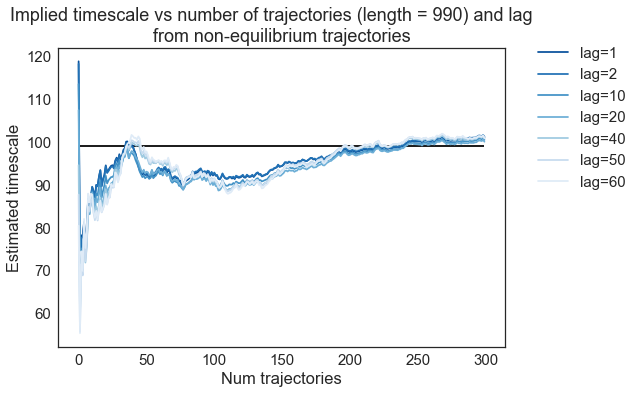

In [168]:
import seaborn as sns
sns.set_style("white")
cols = sns.diverging_palette(255, 133, l=60, n= lags.shape[0], center="dark")
cols = sns.color_palette("Blues_r", lags.shape[0])
x = range(non_eqm_its.shape[1])
with sns.plotting_context("notebook", font_scale=1.5):
    for i in range(lags.shape[0]):
        plt.plot(x, non_eqm_its[i],c=cols[i], label='lag={}'.format(lags[i]))
    plt.hlines(t, xmin=0, xmax=x[-1])
    plt.legend(bbox_to_anchor=(1.3, 1.05))
#     plt.ylim(t-50, t+50)
    plt.xlabel('Num trajectories')
    plt.ylabel('Estimated timescale')
    plt.title("Implied timescale vs number of trajectories (length = {}) and lag\
    \nfrom non-equilibrium trajectories".format(eqm_trajs.shape[1]))